In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
data = pd.read_csv('..\..\..\listings.csv') #Importing Dataset
        
data_Numeric = pd.DataFrame(data[["id","host_total_listings_count","zipcode","latitude","longitude","accommodates","bathrooms","bedrooms","beds","price","weekly_price","monthly_price","security_deposit","cleaning_fee","guests_included","extra_people","minimum_nights","maximum_nights","availability_30","availability_90","availability_365","number_of_reviews","review_scores_rating","review_scores_accuracy","review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value","reviews_per_month"]])

for var in data_Numeric:
    if(data_Numeric[var].dtypes == "object"):
        data_Numeric[var] = data_Numeric[var].str.replace(',', '').str.replace('$', '')
        data_Numeric[var] = data_Numeric[var].apply(pd.to_numeric,errors='coerce')
    
data_Numeric_changed =data_Numeric.dropna()

price_changed = pd.DataFrame(data_Numeric_changed["price"])
reviewscore_changed = pd.DataFrame(data_Numeric_changed["review_scores_rating"])

useless = ["zipcode","latitude","longitude"]
data_Numeric=data_Numeric.drop(axis=1,columns=useless)

data_Numeric_changed.head()

,id,host_total_listings_count,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
1,953595,6.0,98119.0,47.639123,-122.365666,4,1.0,1.0,1.0,150.0,...,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.48
9,2493658,6.0,98119.0,47.637492,-122.366889,4,1.0,1.0,1.0,150.0,...,324,32,97.0,10.0,10.0,10.0,10.0,10.0,9.0,1.55
11,4454295,1.0,98119.0,47.637214,-122.360046,2,1.0,1.0,1.0,99.0,...,229,8,97.0,10.0,10.0,9.0,10.0,10.0,9.0,0.98
12,3883392,1.0,98119.0,47.635546,-122.373171,4,1.0,2.0,3.0,245.0,...,362,13,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0.92
32,5978498,1.0,98119.0,47.640633,-122.372709,4,3.0,3.0,2.0,175.0,...,213,8,88.0,9.0,9.0,9.0,9.0,10.0,9.0,1.31


In [3]:
from sklearn.model_selection import train_test_split

data_Numeric_Train, data_Numeric_test,price_Train, price_test,reviewscore_Train, reviewscore_test = train_test_split(data_Numeric_changed,price_changed,reviewscore_changed,test_size = 0.25)

print("Train Set :", data_Numeric_Train.shape, price_Train.shape, reviewscore_Train.shape)
print("Test Set  :", data_Numeric_test.shape, price_test.shape, reviewscore_test.shape)

Train Set : (532, 30) (532, 1) (532, 1)
Test Set  : (178, 30) (178, 1) (178, 1)


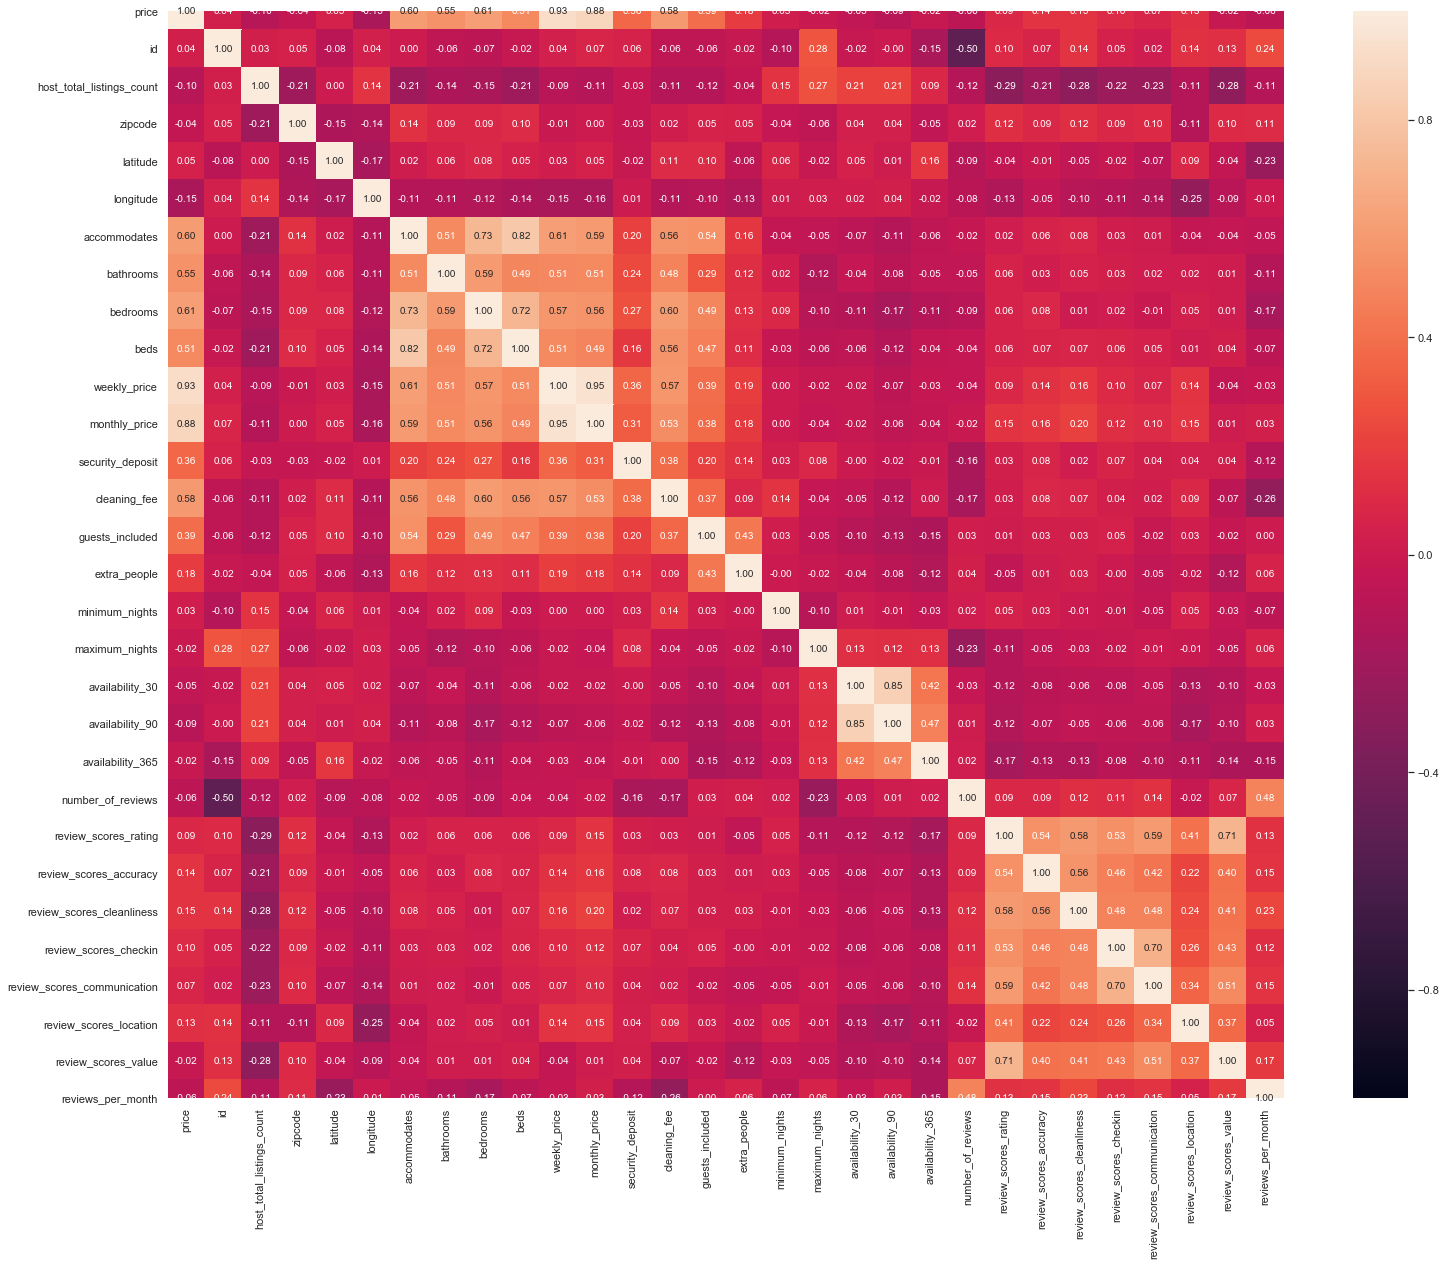

In [4]:
# Correlation between Response and the Predictors
trainDF = pd.concat([price_Train, data_Numeric_Train.reindex(index=data_Numeric_Train.index)], sort = False)

f, axes = plt.subplots(1, 1, figsize=(25, 20))
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

In [5]:
count = 0
highrelation = []
for var in trainDF.corr():
    if(trainDF.corr()['price'][count] > 0.5):
        print("Variables that are Highly Related:",var)
        if(var != "price"):
            highrelation.append(var) 
    count+=1
    
index = 0
Multi_High_Related_Train = {} 
Multi_High_Related_Test = {}

for var in highrelation:
    if(index < len(highrelation)):
        Multi_High_Related_Train[index]={}  
        Multi_High_Related_Test[index]={}
        index+=1

index = 0
index2 = 0
for var in Multi_High_Related_Train:
    for var2 in Multi_High_Related_Train:
        if(index2 < len(Multi_High_Related_Train) and var!=var2):
            Multi_High_Related_Train[index][index2]={}
            Multi_High_Related_Test[index][index2]={}
            index2+=1
    index2=0
    index+=1

index = 0
index2 = 0
index3 = 0

for var in highrelation:
    for var2 in highrelation:
        if(var2!=var and index<len(highrelation)):
            for var3 in highrelation:
                if(var3 != var2 and var3 != var and index2<len(highrelation)):
                    Multi_High_Related_Train[index][index2][index3] = pd.DataFrame(data_Numeric_Train[[var,var2,var3]])
                    Multi_High_Related_Test[index][index2][index3] = pd.DataFrame(data_Numeric_test[[var,var2,var3]])                   
                    index3+=1
            index2+=1
            index3=0
    index+=1
    index2=0

Variables that are Highly Related: price
Variables that are Highly Related: accommodates
Variables that are Highly Related: bathrooms
Variables that are Highly Related: bedrooms
Variables that are Highly Related: beds
Variables that are Highly Related: weekly_price
Variables that are Highly Related: monthly_price
Variables that are Highly Related: cleaning_fee


In [6]:
from sklearn.linear_model import LinearRegression

index = 0
linreg = {}

for var in Multi_High_Related_Train:
    if(index < len(Multi_High_Related_Train)):
        linreg[index]={} 
        index+=1
        
index = 0
index2 = 0
for var in Multi_High_Related_Train:
    for var2 in Multi_High_Related_Train[var]:
        if(index2 < len(Multi_High_Related_Train)):
            linreg[index][index2]={}
            index2+=1
    index2=0
    index+=1
    
index = 0
index2 = 0
index3 = 0
for var in Multi_High_Related_Train:
    for var2 in Multi_High_Related_Train[var]:
        for var3 in Multi_High_Related_Train[var][var2]:
            linreg[index][index2][index3] = LinearRegression()
            linreg[index][index2][index3].fit(Multi_High_Related_Train[index][index2][index3], price_Train)
            index3+=1
        index3=0
        index2+=1
    index2=0
    index+=1


In [7]:
index = 0
price_train_pred = {}
price_test_pred = {}

for var in linreg:
    if(index < len(linreg)):
        price_train_pred[index]={} 
        price_test_pred[index]={} 
        index+=1

index = 0
index2 = 0
for var in linreg:
    for var2 in linreg[var]:
        price_train_pred[index][index2] = {}
        price_test_pred[index][index2] = {}
        index2+=1
    index2=0
    index+=1
    
index = 0
index2 = 0
index3 = 0
for var in linreg:
    for var2 in linreg[var]:
        for var2 in linreg[var][var2]:
            price_train_pred[index][index2][index3] = linreg[index][index2][index3].predict(Multi_High_Related_Train[index][index2][index3])
            price_test_pred[index][index2][index3] = linreg[index][index2][index3].predict(Multi_High_Related_Test[index][index2][index3])
            index3+=1
        index3=0
        index2+=1
    index2=0
    index+=1

In [17]:
index = 0
index2 = 0
index3 = 0

# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error


for var in price_train_pred:
    for var2 in price_train_pred[var]:
        for var3 in price_train_pred[var][var2]:
            if(linreg[index][index2][index3].score(Multi_High_Related_Train[index][index2][index3], price_Train)>0.87):
                print("For [",var,"][",var2,"][",var3,"]")
                print(Multi_High_Related_Train[index][index2][index3].columns)
                print("Train Explained Variance (R^2) \t:", linreg[index][index2][index3].score(Multi_High_Related_Train[index][index2][index3], price_Train))
                print()
                index3+=1
        index3=0
        index2+=1
    index2=0
    index+=1

For [ 0 ][ 3 ][ 0 ]
Index(['accommodates', 'weekly_price', 'bathrooms'], dtype='object')
Test Explained Variance (R^2) 	: 0.8868381294648792

For [ 1 ][ 3 ][ 0 ]
Index(['bathrooms', 'weekly_price', 'accommodates'], dtype='object')
Test Explained Variance (R^2) 	: 0.8868381294648792

For [ 4 ][ 0 ][ 0 ]
Index(['weekly_price', 'accommodates', 'bathrooms'], dtype='object')
Test Explained Variance (R^2) 	: 0.8868381294648792

For [ 4 ][ 1 ][ 0 ]
Index(['weekly_price', 'bathrooms', 'accommodates'], dtype='object')
Test Explained Variance (R^2) 	: 0.886838129464879

